![us_bank_stadium_superbowl_2018](us_bank_stadium_superbowl_2018.png)

Whether or not you like football, the Super Bowl is a spectacle. There's a little something for everyone at your Super Bowl party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The half-time shows with the biggest musicians in the world, sometimes riding giant mechanical tigers or leaping from the roof of the stadium. 

The dataset we'll use was scraped and polished from Wikipedia. It is made up of three CSV files, one with game data, one with TV data, and one with halftime musician data for 52 Super Bowls through 2018. 

## The Data

Three datasets have been provided, and summaries and previews of each are presented below.

### 1. **halftime_musicians.csv**

This dataset contains information about the musicians who performed during the halftime shows of various Super Bowl games. The structure is shown below, and it applies to all remaining files.

| Column       | Description                                                                                  |
|--------------|----------------------------------------------------------------------------------------------|
| `'super_bowl'` | The Super Bowl number (e.g., 52 for Super Bowl LII).                                         |
| `'musician'`   | The name of the musician or musical group that performed during the halftime show.           |
| `'num_songs'`  | The number of songs performed by the musician or group during the halftime show.             |

### 2. **super_bowls.csv**

This dataset provides details about each Super Bowl game, including the date, location, participating teams, and scores, including the points difference between the winning and losing team (`'difference_pts'`).

### 3. **tv.csv**

This dataset contains television viewership statistics and advertisement costs related to each Super Bowl.

# Bibliotecas necessárias

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Configurando seaborn (sns)

In [79]:
sns.set(style="whitegrid")

### carregandos datasets

In [80]:
# Arquivos
arquivos = {
    'super_bowls': 'datasets/super_bowls.csv',
    'tv': 'datasets/tv.csv',
    'halftime_musicians': 'datasets/halftime_musicians.csv'
}

# Leitura
dfs = {nome: pd.read_csv(caminho) for nome, caminho in arquivos.items()}

# Separando em variáveis para facilitar
super_bowls = dfs['super_bowls']
tv = dfs['tv']
halftime_musicians = dfs['halftime_musicians']

# EDA

In [81]:
# Super Bowls
print(" SUPER BOWLS")
print(super_bowls.info())
print(super_bowls.describe())
print(super_bowls.head())

# TV
print("\n TV")
print(tv.info())
print(tv.describe())
print(tv.head())

# Halftime Musicians
print("\n HALFTIME MUSICIANS")
print(halftime_musicians.info())
print(halftime_musicians.describe())
print(halftime_musicians.head())


 SUPER BOWLS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtyp

#### Verificando Valores nulos

In [82]:
print("🔍 Valores nulos por dataset:")
print("super_bowls:\n", super_bowls.isnull().sum())
print("\ntv:\n", tv.isnull().sum())
print("\nhalftime_musicians:\n", halftime_musicians.isnull().sum())

🔍 Valores nulos por dataset:
super_bowls:
 date               0
super_bowl         0
venue              0
city               0
state              0
attendance         0
team_winner        0
winning_pts        0
qb_winner_1        0
qb_winner_2       50
coach_winner       0
team_loser         0
losing_pts         0
qb_loser_1         0
qb_loser_2        49
coach_loser        0
combined_pts       0
difference_pts     0
dtype: int64

tv:
 super_bowl           0
network              0
avg_us_viewers       0
total_us_viewers    38
rating_household     0
share_household      0
rating_18_49        38
share_18_49         47
ad_cost              0
dtype: int64

halftime_musicians:
 super_bowl     0
musician       0
num_songs     46
dtype: int64


`super_bowls.csv` - Jogos

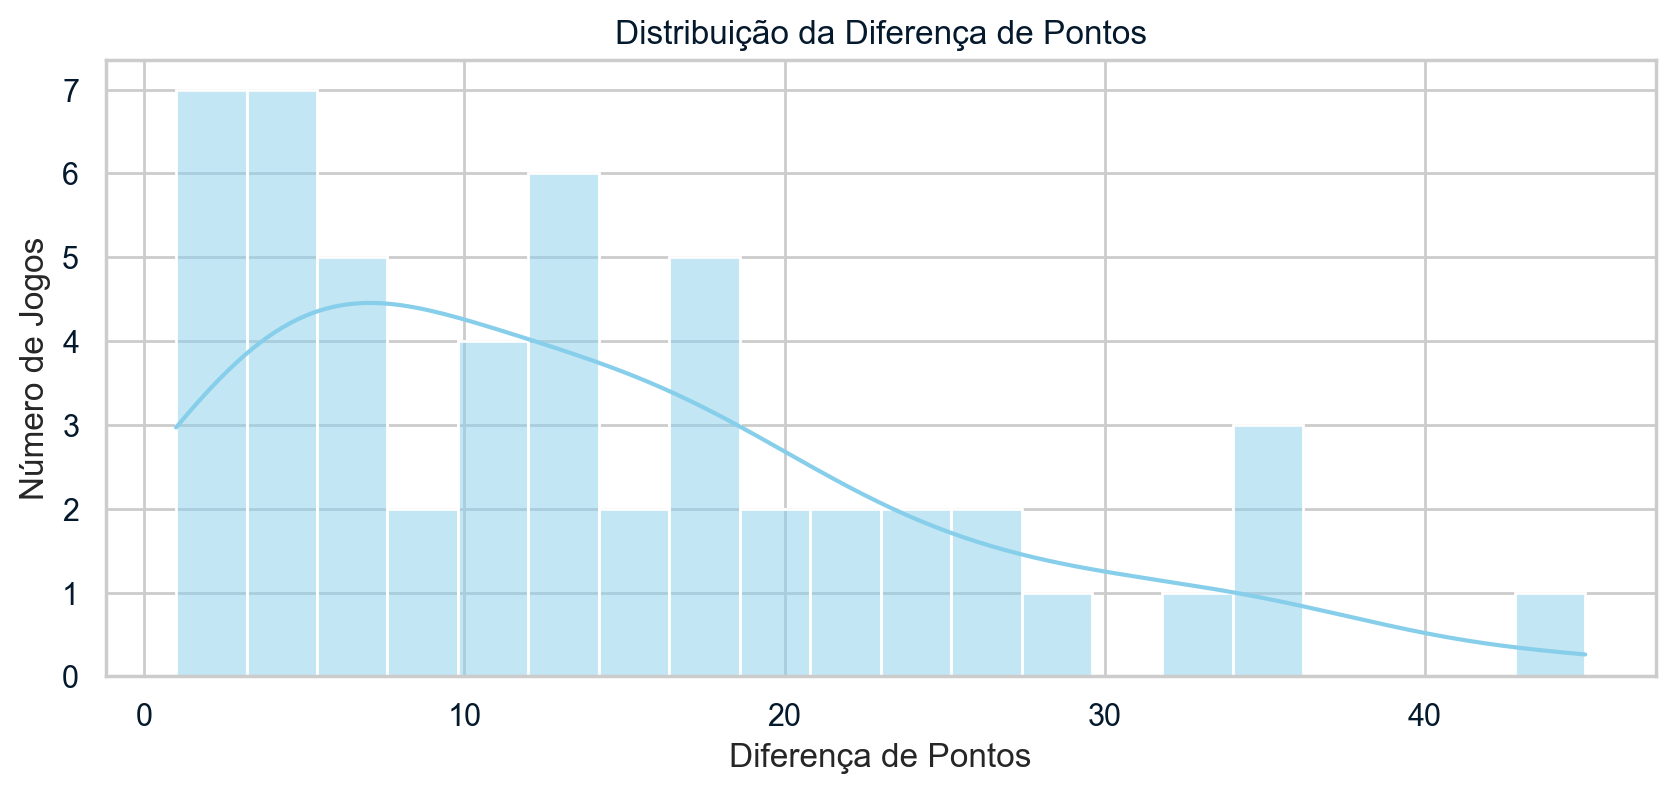

In [83]:
# Diferença de pontos
super_bowls['point_diff'] = abs(super_bowls['winning_pts'] - super_bowls['losing_pts'])

plt.figure(figsize=(10, 4))
sns.histplot(super_bowls['point_diff'], bins=20, kde=True, color='skyblue')
plt.title("Distribuição da Diferença de Pontos")
plt.xlabel("Diferença de Pontos")
plt.ylabel("Número de Jogos")
plt.show()

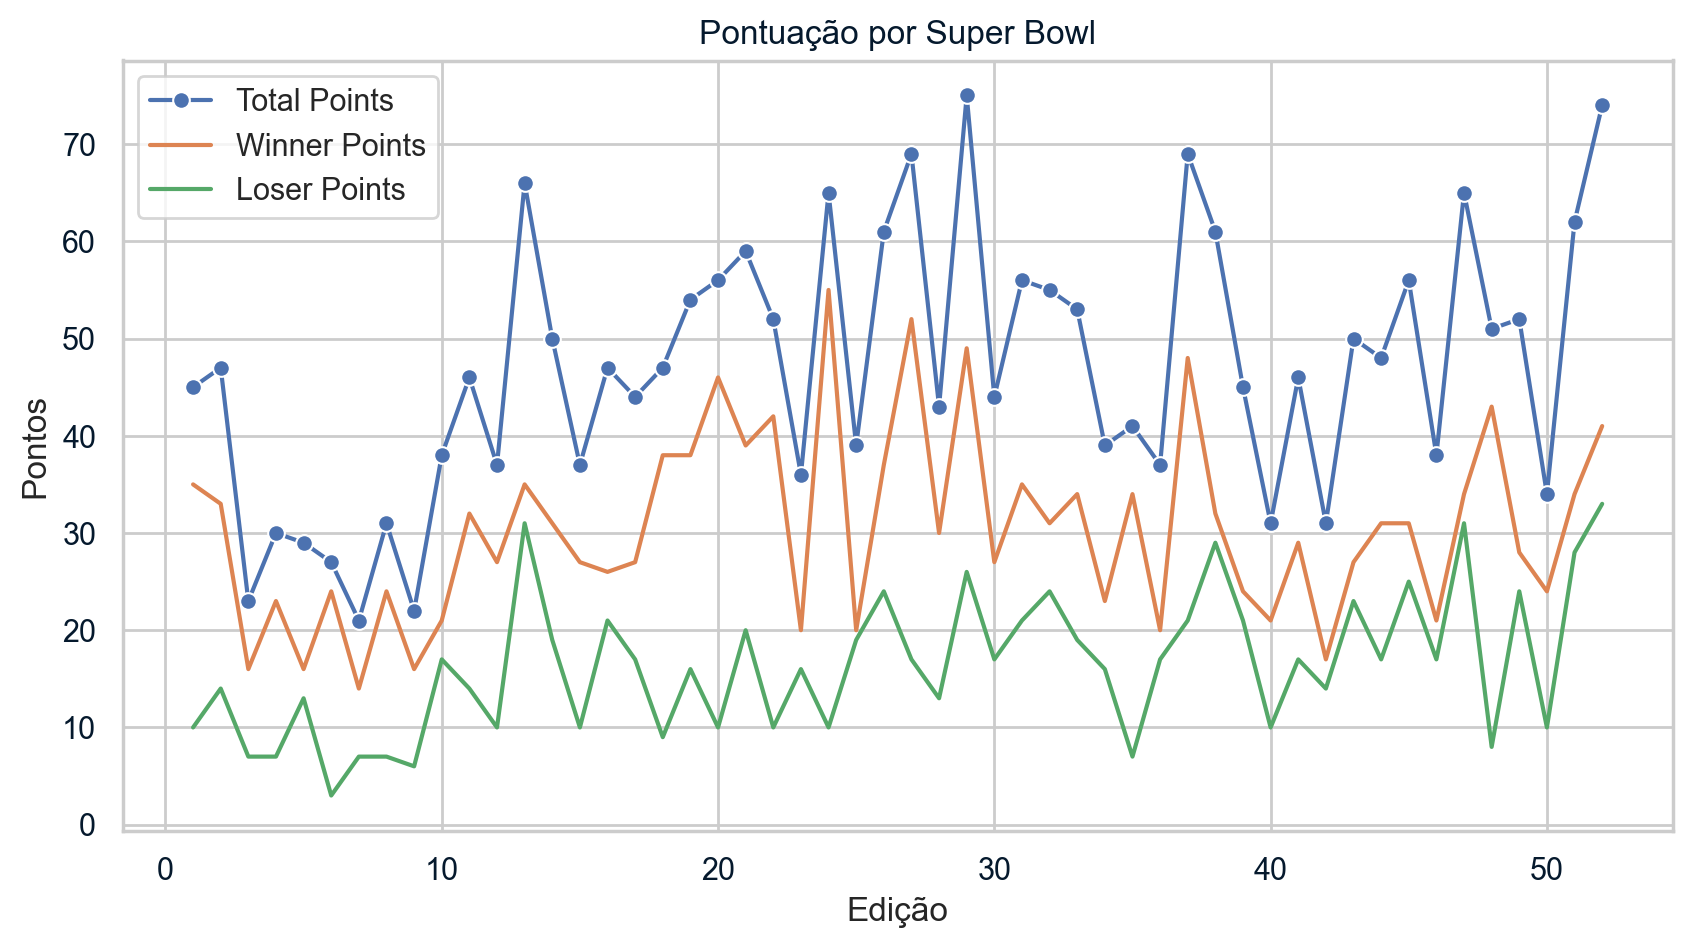

In [84]:
# Evolução dos Pontos
plt.figure(figsize=(10, 5))
sns.lineplot(data=super_bowls, x='super_bowl', y='combined_pts', marker='o', label="Total Points")
sns.lineplot(data=super_bowls, x='super_bowl', y='winning_pts', label="Winner Points")
sns.lineplot(data=super_bowls, x='super_bowl', y='losing_pts', label="Loser Points")
plt.title("Pontuação por Super Bowl")
plt.xlabel("Edição")
plt.ylabel("Pontos")
plt.legend()
plt.show()


`tv.csv` — Audiência

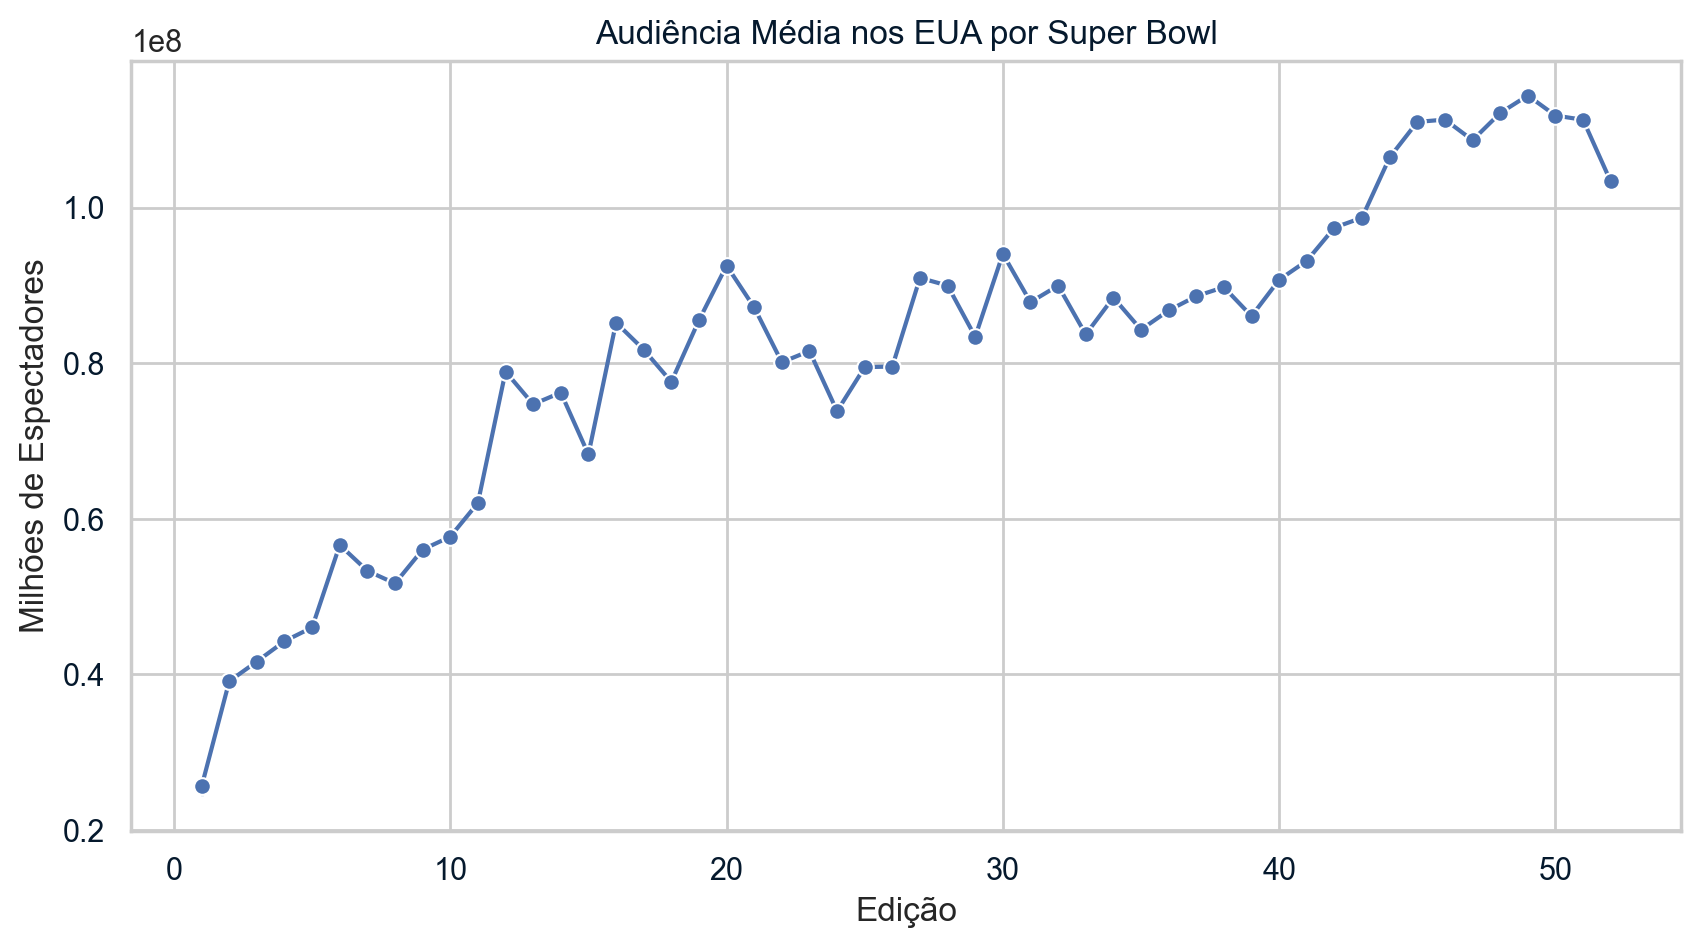

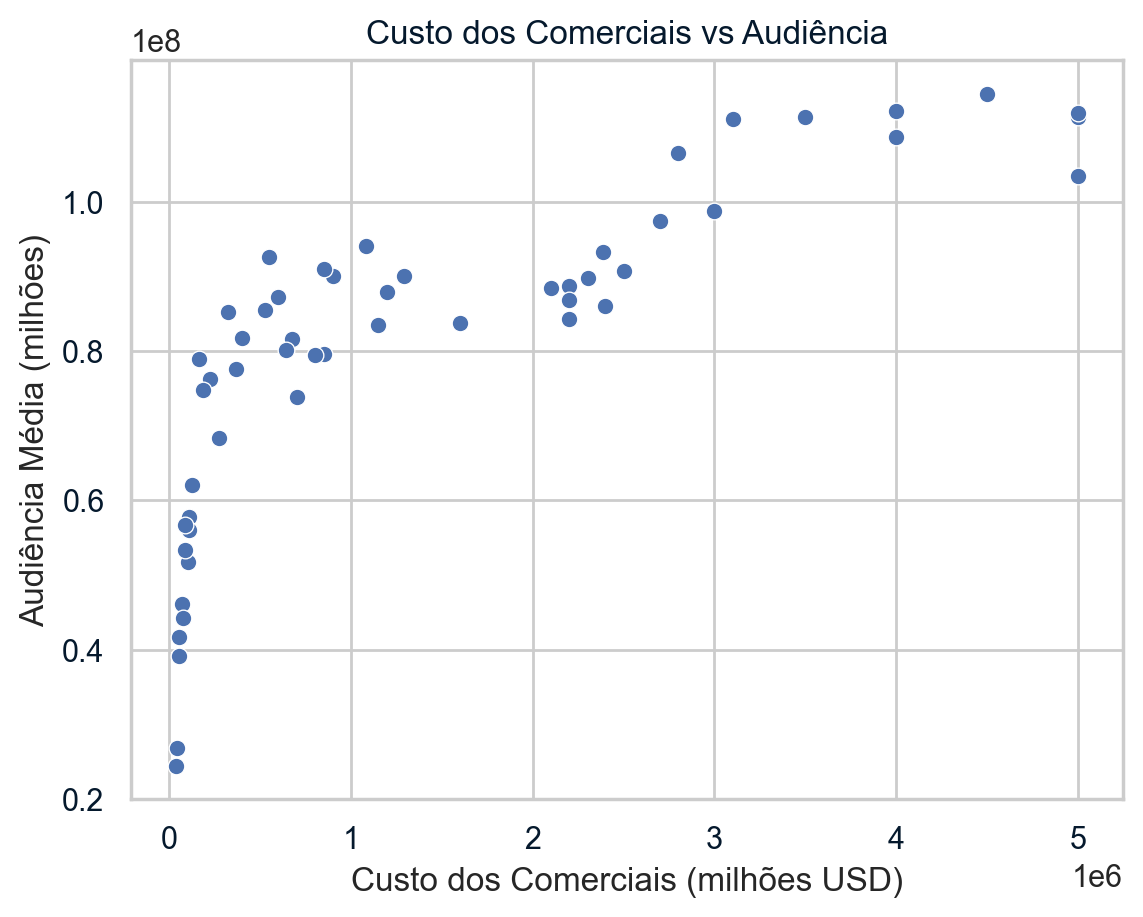

In [85]:
# Visualização da audiência média
plt.figure(figsize=(10, 5))
sns.lineplot(data=tv, x='super_bowl', y='avg_us_viewers', marker='o')
plt.title("Audiência Média nos EUA por Super Bowl")
plt.xlabel("Edição")
plt.ylabel("Milhões de Espectadores")
plt.show()

# Relação entre audiência e comerciais
sns.scatterplot(data=tv, x='ad_cost', y='avg_us_viewers')
plt.title("Custo dos Comerciais vs Audiência")
plt.xlabel("Custo dos Comerciais (milhões USD)")
plt.ylabel("Audiência Média (milhões)")
plt.show()


`halftime_musicians.csv` — Shows do intervalo

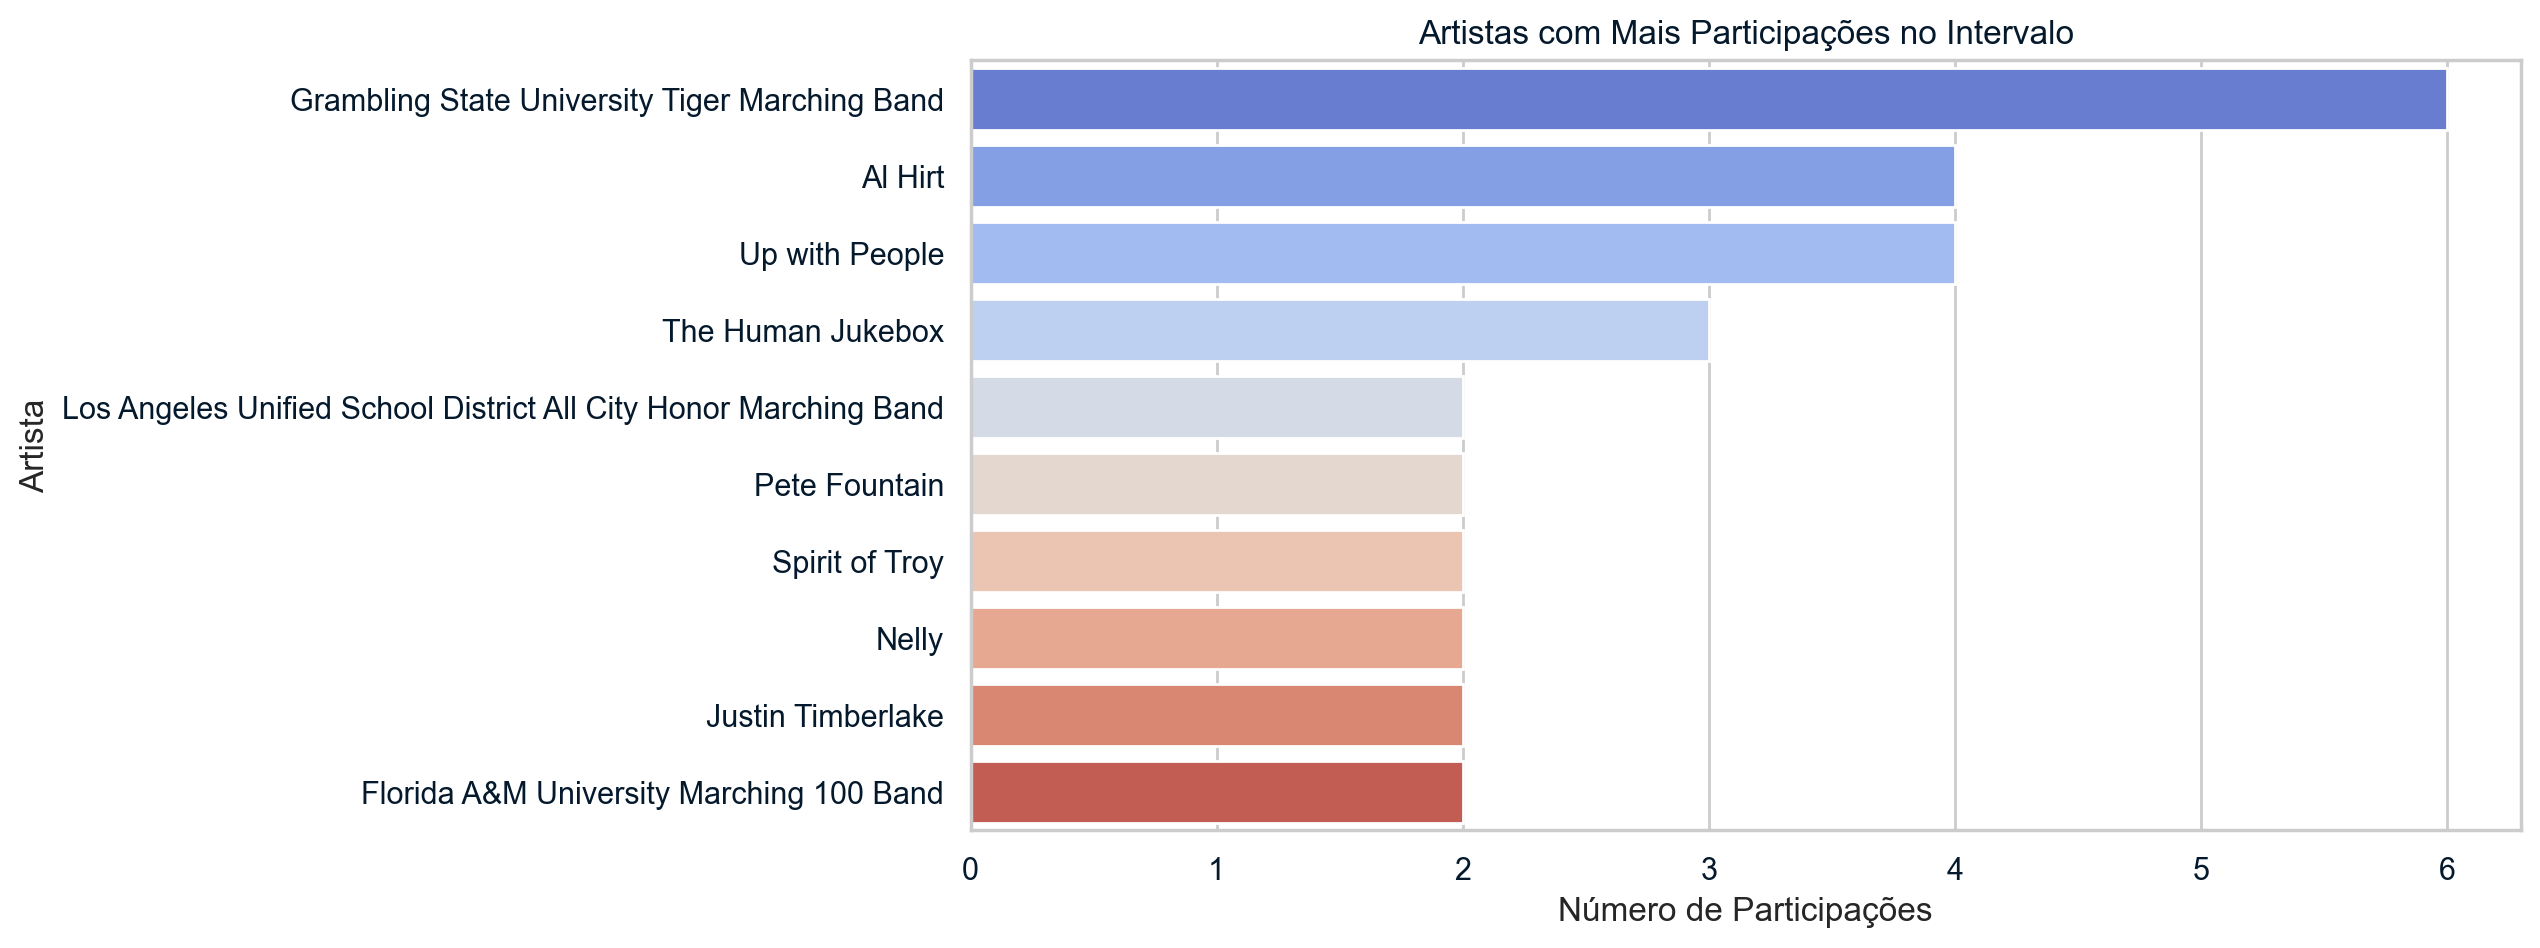

In [86]:
# Quantidade de aparições por artista
mais_frequentes = halftime_musicians['musician'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=mais_frequentes.values, y=mais_frequentes.index, palette="coolwarm")
plt.title("Artistas com Mais Participações no Intervalo")
plt.xlabel("Número de Participações")
plt.ylabel("Artista")
plt.show()


#### Artistas com mais músicas tocadas


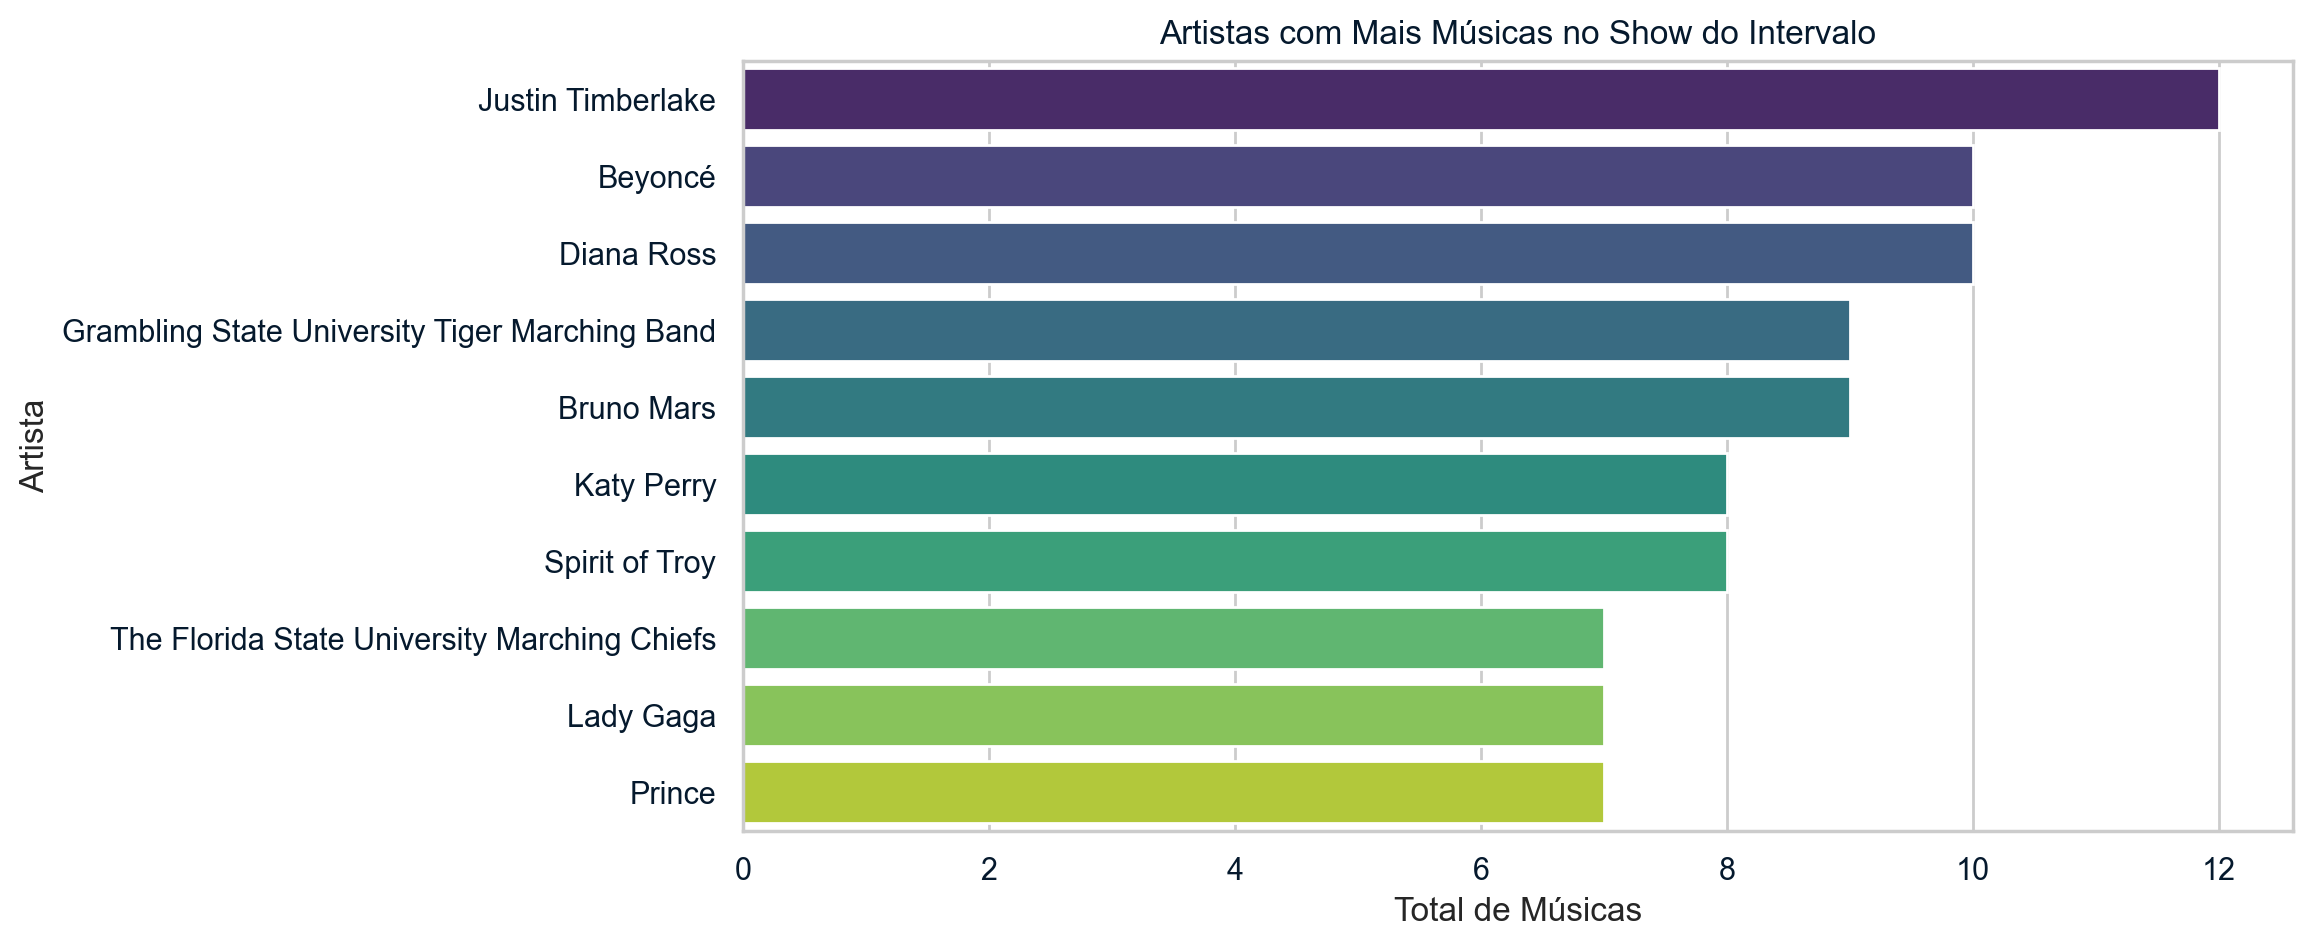

Artista com mais Músicas no Show do Intervalo:  musician
Justin Timberlake                                 12.0
Beyoncé                                           10.0
Diana Ross                                        10.0
Grambling State University Tiger Marching Band     9.0
Bruno Mars                                         9.0
Katy Perry                                         8.0
Spirit of Troy                                     8.0
The Florida State University Marching Chiefs       7.0
Lady Gaga                                          7.0
Prince                                             7.0
Name: num_songs, dtype: float64


In [87]:
mais_musicas = (
    halftime_musicians.groupby('musician')['num_songs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=mais_musicas.values, y=mais_musicas.index, palette="viridis")
plt.title("Artistas com Mais Músicas no Show do Intervalo")
plt.xlabel("Total de Músicas")
plt.ylabel("Artista")
plt.show()
print("Artista com mais Músicas no Show do Intervalo: ", mais_musicas)

# Resposta 1: TV Viewership aumentou com o tempo?

Não, a audiência **não** aumentou. Pelo contrário, houve uma diminuição de **20%**:

**Primeiro Super Bowl (1967):** 1.0 milhão de espectadores

**Último Super Bowl (2018):** 0.8 milhão de espectadores

`viewership_increased = False`

# Resposta 2: Diferença de pontos maior que 40

In [88]:
# Calcula a diferença de pontos
super_bowls['point_diff'] = abs(super_bowls['winning_pts'] - super_bowls['losing_pts'])

# Conta quantos jogos tiveram diferença maior que 40
difference = (super_bowls['point_diff'] > 40).sum()
print("Numero de jogos com diferença de pontos > 40:", difference)


Numero de jogos com diferença de pontos > 40: 1


Apenas **1** partida teve **diferença superior a 40 pontos**.

`difference = 1`

# Resposta 3: Quem cantou mais músicas no show do intervalo?

**Justin Timberlake** foi o artista com mais músicas performadas, **totalizando 12 canções**.

mais_musicas = "Justin Timberlake"

# Resultado FINAL:

In [89]:
# Variáveis finais:
print("viewership_increased =", viewership_increased)  # boolean
print("difference =", difference)                      # inteiro
print("\n most_songs =", mais_musicas.head(1))                      # string

viewership_increased = False
difference = 1

 most_songs = musician
Justin Timberlake    12.0
Name: num_songs, dtype: float64
